# Filtrage 1

## Relevés de CO2

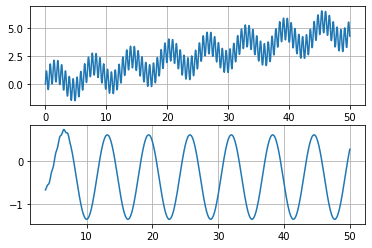

In [65]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 50, 1000)
y = 0.1*x + np.sin(x) + np.sin(10*x)
#   XXXXX               ############

p = 75

yp = np.zeros_like(y)
for i in range(len(y)):
    for k in range(max(0, i+1-p), i+1):
        yp[i] += y[k]/p                  ############

f, a = plt.subplots(2)
a[0].grid()
a[1].grid()
a[0].plot(x, y)
a[1].plot(x[p:], yp[:-p] - yp[p:])       #   XXXXX

### Ecrire la formule du calcul de la moyenne par une fenêtre glissante, et son expression sous forme de convolution.

$$
    y(n) = N^{-1}\sum_{k=0}^{N-1}x(n-k) = x \star \mathbb{1}_{[0, N-1]}
$$

### Ecrire le même traitement dans le domaine fréquentiel.

$$
    \hat{y} = \hat{h} \times \hat{x}
$$

### Refaites le calcul de ĥ(ν).

$$
    \hat{h}(\nu) = \sum_{n\in\mathbb{Z}} h(n) e^{-2i\pi \nu n} \\
    = \sum_{n\in [0, N-1]} e^{-2i\pi \nu n} \\
    = \sum_{n\in [0, N-1]} (e^{-2i\pi \nu})^n \\
    = \frac{1 - e^{-2i\pi \nu N}}{1 - e^{-2i\pi \nu}} \\
    = \frac{e^{-i\pi \nu N}}{e^{-i\pi \nu}} \times \frac{2i}{e^{i\pi \nu} - e^{-i\pi \nu}} \times \frac{e^{i\pi \nu N} - e^{-i\pi \nu N}}{2i} \\
    = \frac{e^{-i\pi \nu N}}{e^{-i\pi \nu}} \times \frac{sin(i\pi\nu N)}{sin(i\pi\nu)} \\
    = e^{-i\pi \nu (N-1)} \times \frac{sin(i\pi\nu N)}{sin(i\pi\nu)}
$$

### Quels sont les effets de l’application de la porte causale ?

Moyenne glissante (lissage).

## Exemple des notes d’un piano

### Ecrire l’expression de l’estimation de l’enveloppe énergétique. Ecrire les effets produits selon la valeur de a. Expliquer comment on arrive à l’expression d’une convolution.

Avec $a \in [0, 1]$ :
$$
    y(n) = \sum_{p=0}^{n} a^p x_2(n-p)
$$

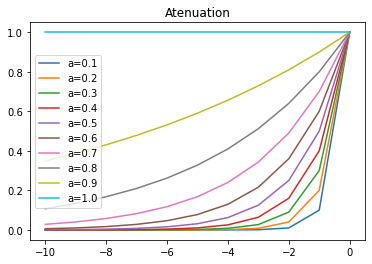

In [17]:
x = np.arange(11)

for a in np.linspace(0.1,1,10):
    plt.plot(x[::-1]-10, np.exp(np.log(a)*x)/np.exp(np.log(a)*x).max(), label=f'a={a:.1f}')
plt.title("Atenuation")
plt.legend()
plt.show()

### Donnez l’expression de la convolution.

$$
    y = x \star a^n \mathbb{1}_{[0, +\infty[}
$$

## Détection de fronts montants

### Pourquoi faut-il « moyenner » le signal ? Quel est le choix qui est fait pour le calcul de d(n) ?

Pour ne pas detecter les rapide petites variations.
Soit ${SMA}_N[x]$ la moyenne glissante de $x$ sur les $N$ dernieres valeurs.
$$
    d_N(n) = {SMA}_N[x](n) - {SMA}_N[x](n-N) \\
    d_N(n) = \sum_{p =0}^{N-1} 1 \times y (n− p) + \sum_{p=N}^{2N-1} -1 \times y (n−p) \\
    d_N(n) = \sum_{p \in \mathbb{Z}} w(p) y(n-p)
$$
Avec :
$$
    w: n \mapsto \left\{
    \begin{array}{lll}
        1 \text{ si } x \in [0, N-1] \\
        -1 \text{ si } x \in [N, 2N-1] \\
        0 \text{ sinon.}
    \end{array}
\right.
$$

### Ecrire l’expression choisie pour estimer d(n). Donne-la sous forme de convolution ainsi que les w(p).

$$
    d_N(n) = \sum_{p \in \mathbb{Z}} w(p) x(n-p) \\
    = x \star w
$$

# Filtrage 2

## SLI

### Ecrire la définition d’un système linéaire et invariant.

$$
    y = T[x] \\
    T[a x + y] = a T[x] + T[y] \\
    T[(n \mapsto x(n+\Delta))] = (n \mapsto y(n+\Delta))
$$

### Donner la définition d’une réponse impulsionnelle. Montrer qu’un SLI réalise une convolution.

$$
    y = T[x] \\
        = \sum T[x \star \delta_i] \\
        = \sum h(i) \times x(-i) \\
        = h \star x
$$

### Faire un dessin illustrant la formule de la moyenne glissante pondérée.

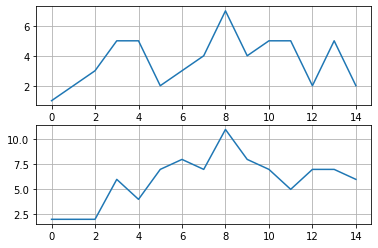

In [97]:
x = np.arange(0, 15)
y = np.array([1,2,3,5,5,2,3,4,7,4,5,5,2,5,2])


def w(p):
    pond = {
        0: 1,
        1: .5,
        2: .2,
        3: .3
    }
    if p in pond.keys():
        return pond[p]
    else:
        return 0


yp = np.zeros_like(y)
for i in range(len(y)):
    for k in range(i, -1, -1):
        yp[i] += w(k) * y[k-i+1]


f, a = plt.subplots(2)
a[0].grid()
a[1].grid()
a[0].plot(x, y)
a[1].plot(x, yp)

## 

### Réponse en fréquence : écrire l’expression de la réponse en fréquence (ou gain complexe) et la réponse à une exponentielle complexe (onde de Fourier).

$$
    y = h \star x \\
    \hat{y} = \hat{h} \times \hat{x}
$$
Donc si $x_\nu = e^{-2i\pi \nu n}$ alors:
$$
    T[x_\nu] = \hat{h(\nu)} \times x_\nu
$$

### Qu’appelle-t’on « stabilité entrée bornée-sortie bornée » (EBSB ou BIBO) ?

Une entrée bornée sort bornée de ce systeme ($\Leftrightarrow h \in l^1$).

### Qu’appelle-t’on « système causal » ?

$$
    \forall n >0, h(n) = 0
$$